# Business Problem

## Context
Olist adalah startup e-commerce yang didirikan pada tahun 2015 dan mulai beroperasi pada tahun 2016. Pada tahun 2018, Brazil memiliki populasi sekitar 210 juta jiwa, dengan lebih dari 150 juta penduduk yang memiliki akses internet dan sekitar 60% di antaranya pernah melakukan pembelian online. Pasar e-commerce di Brazil pada saat itu menunjukkan pertumbuhan pesat dengan nilai transaksi yang diperkirakan mencapai US$ 24 miliar.

Dalam upaya agresif untuk mengakuisisi pelanggan, Olist telah menginvestasikan anggaran marketing sebesar sekitar US$ 10 juta, yang menghasilkan 96.096 pelanggan. Dengan demikian, rata-rata biaya akuisisi per pelanggan diperkirakan sekitar US$ 104. Setelah fase akuisisi, Olist kini berfokus pada strategi retensi dengan tujuan meningkatkan repeat order. Mengingat biaya marketing untuk mengaktifkan kembali pelanggan cenderung lebih rendah, diperkirakan biaya retargeting pelanggan yang sudah pernah bertransaksi mencapai sekitar 40% lebih rendah dibandingkan dengan biaya akuisisi pelanggan baru.

Dengan pendekatan berbasis data, Olist bertujuan untuk mengidentifikasi pelanggan yang berisiko churn dan menyesuaikan strategi marketing secara lebih efisien. Hal ini diharapkan tidak hanya mengurangi total biaya pemasaran, tetapi juga meningkatkan lifetime value (LTV) dari setiap pelanggan.

## Problem Statement
Meskipun Olist berhasil mengakuisisi 96.096 pelanggan dengan biaya signifikan, data awal menunjukkan bahwa hanya sekitar 15–20% dari pelanggan tersebut yang melakukan repeat order. Ini berarti potensi churn yang signifikan, yang diperkirakan bisa mencapai 30% atau lebih. Biaya marketing untuk menarik pelanggan baru memang tinggi (sekitar US$ 104 per pelanggan), sehingga mengoptimalkan retargeting bagi pelanggan yang belum melakukan repeat order menjadi sangat krusial. Tantangan utama yang perlu dipecahkan adalah:

- **Mengidentifikasi Pelanggan Berisiko Churn:**
Menentukan karakteristik dan perilaku yang mengindikasikan bahwa seorang pelanggan kemungkinan besar tidak akan melakukan pembelian ulang tanpa intervensi.

- **Optimalisasi Pengeluaran Marketing:**
Memfokuskan kampanye retargeting pada pelanggan yang berpotensi churn sehingga dapat mengurangi biaya marketing secara keseluruhan dan meningkatkan efektivitas kampanye.

- **Meningkatkan Repeat Order:**
Mengembangkan strategi untuk mengonversi pelanggan yang belum aktif kembali menjadi pelanggan setia dengan target peningkatan repeat order minimal 20%.



## Goals
Berdasarkan permasalahan di atas, tujuan analisis dan model prediksi churn ini adalah:

1. Analisis Perilaku Pelanggan:
    - Menggali pola pembelian, frekuensi transaksi, nilai pembelian, dan waktu sejak pembelian terakhir.
    - Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap churn.
2. Pengembangan Model Prediksi Churn:
    - Membangun model klasifikasi yang mampu mengidentifikasi pelanggan berisiko churn dengan akurasi tinggi.
    - Menetapkan target untuk mengurangi churn rate sebesar minimal 20% dari baseline yang ada.
3. Optimasi Pengeluaran Marketing:
    - Mengarahkan kampanye retargeting kepada segmen pelanggan yang berisiko sehingga dapat menurunkan biaya marketing per pelanggan aktif hingga 30% dibandingkan dengan biaya akuisisi.
4. Penyediaan Insight untuk Strategi Retensi:
    - Menyediakan rekomendasi berbasis data bagi tim marketing untuk menyusun kampanye retensi yang lebih efektif dan meningkatkan lifetime value (LTV) dari setiap pelanggan.


Informasi Customers:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Informasi Orders:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef

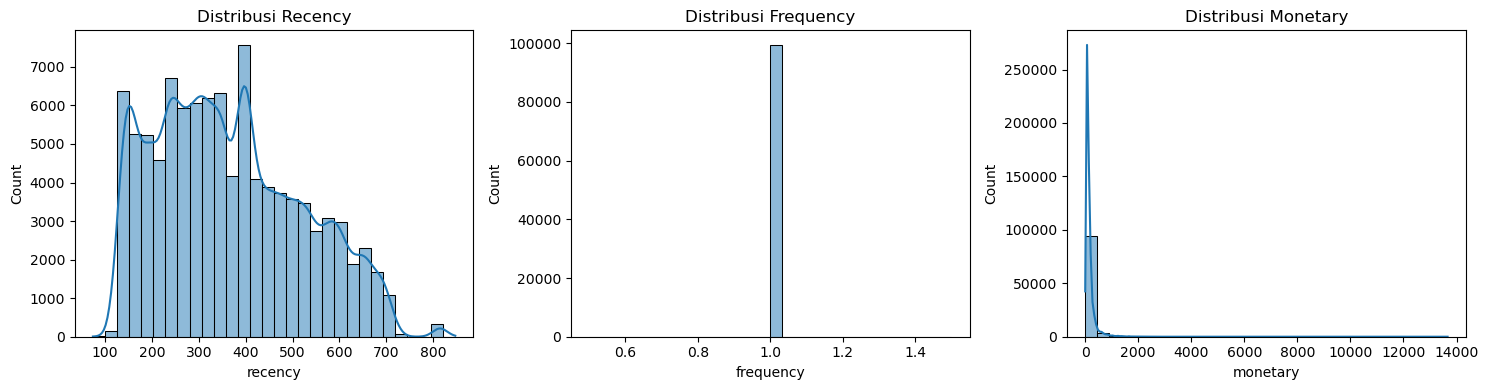

In [14]:
# 1. Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Membaca Seluruh File Dataset dari Kaggle
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
products_en = pd.read_csv('product_category_name_translation.csv')


# 3. Melihat Informasi Awal pada Dataset
print("Informasi Customers:")
print(customers.head())
print("\nInformasi Orders:")
print(orders.head())

# 4. Menggabungkan Data
# Gabungkan orders dengan customers menggunakan 'customer_id'
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')
print("\nHasil merge orders dan customers:")
print(orders_customers.head())

# 5. Data Cleaning
# Cek missing values pada data gabungan
print("\nMissing values per kolom:")
print(orders_customers.isnull().sum())

# Jika ditemukan missing values, bisa gunakan teknik imputasi atau hapus baris (sesuaikan kebutuhan)
# Contoh: menghapus baris yang memiliki missing pada kolom tertentu (jika memang sedikit)
# orders_customers = orders_customers.dropna(subset=['order_purchase_timestamp'])

# Ubah tipe data untuk kolom tanggal agar menjadi datetime
orders_customers['order_purchase_timestamp'] = pd.to_datetime(orders_customers['order_purchase_timestamp'])

# 6. Feature Engineering: Membuat Fitur RFM (Recency, Frequency, Monetary)
# Recency: waktu (dalam hari) sejak pembelian terakhir dilakukan oleh customer.
# Frequency: jumlah pembelian yang dilakukan.
# Monetary: total nilai pembayaran (kita akan hitung dari order_payments).

# Tentukan reference date sebagai hari setelah pembelian terakhir di dataset
reference_date = pd.to_datetime("2018-12-31")

# Buat data R dan F per customer dari orders_customers
rf = orders_customers.groupby('customer_id').agg({
    'order_id': 'nunique',  # Frequency: jumlah order unik
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days  # Recency: hari sejak order terakhir
}).reset_index()
rf.rename(columns={'order_id': 'frequency', 'order_purchase_timestamp': 'recency'}, inplace=True)

# Hitung Monetary: jumlah total payment per customer
# Langkah 1: Gabungkan orders dengan order_payments untuk mendapatkan total pembayaran per order
orders_payments = pd.merge(orders[['order_id', 'customer_id']], order_payments, on='order_id', how='left')
order_payment_sum = orders_payments.groupby('order_id')['payment_value'].sum().reset_index()

# Langkah 2: Gabungkan kembali dengan orders untuk mendapatkan customer_id terkait
orders_payment_customers = pd.merge(orders[['order_id', 'customer_id']], order_payment_sum, on='order_id', how='left')

# Langkah 3: Agregasi total pembayaran per customer
monetary = orders_payment_customers.groupby('customer_id')['payment_value'].sum().reset_index()
monetary.rename(columns={'payment_value': 'monetary'}, inplace=True)

# Gabungkan fitur R, F, dan Monetary
rfm = pd.merge(rf, monetary, on='customer_id', how='left')
print("\nContoh Fitur RFM:")
print(rfm.head())

# 7. Visualisasi Distribusi Fitur RFM (Opsional)
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], bins=30, kde=True)
plt.title("Distribusi Recency")

plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], bins=30, kde=True)
plt.title("Distribusi Frequency")

plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary'], bins=30, kde=True)
plt.title("Distribusi Monetary")

plt.tight_layout()
plt.show()


# Churn Analysis

Olist merupakan e-commerce yang masih relatif baru, sehingga tidak tepat untuk mendefinisikan churn hanya berdasarkan lamanya hari tidak bertransaksi atau sekadar frekuensi pembelian. Hal ini disebabkan oleh fakta bahwa mayoritas pelanggan baru cenderung melakukan pembelian hanya sekali. Oleh karena itu, pendekatan awal yang lebih relevan adalah melakukan segmentasi pelanggan menjadi tiga kelompok, yaitu:

1. New Customer: Pelanggan yang melakukan pembelian pertama kali dalam lima bulan sebelum data dikumpulkan.
2. One-Time Buyer: Pelanggan yang hanya melakukan satu transaksi dan dia bukan New Customer.
3. Repeat Buyer: Pelanggan yang telah melakukan pembelian lebih dari satu kali.

                 customer_unique_id      first_purchase       last_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   

   num_orders         segment  
0           1  One-Time Buyer  
1           1  One-Time Buyer  
2           1  One-Time Buyer  
3           1  One-Time Buyer  
4           1  One-Time Buyer  


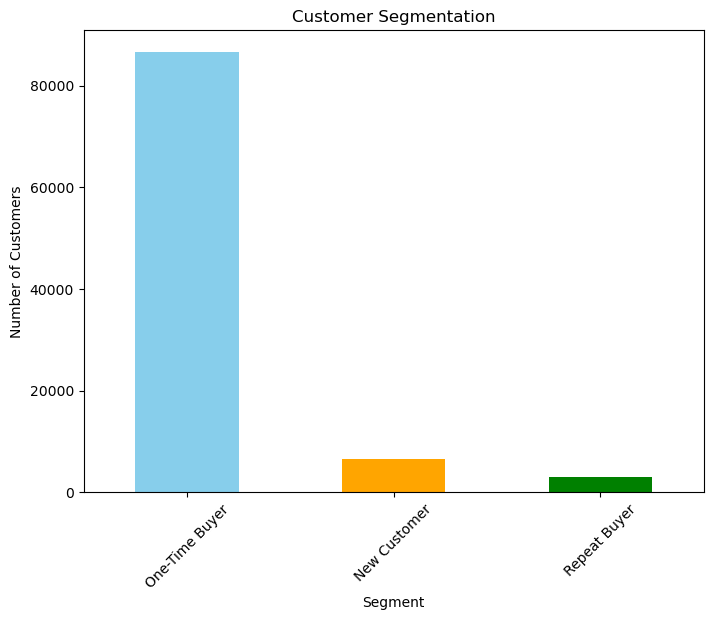

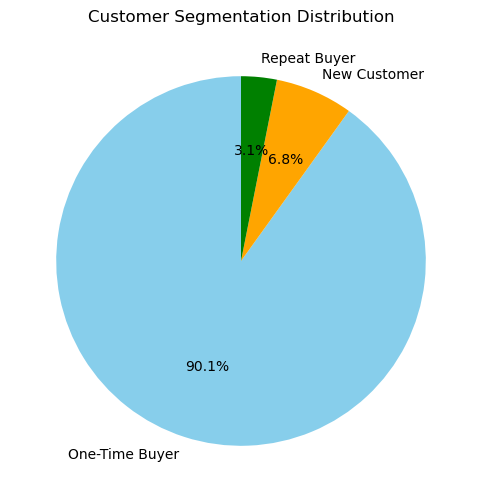

In [ ]:
# Tentukan reference date (misal: 31 Desember 2018) dan hitung batas 3 bulan sebelumnya.
reference_date = pd.to_datetime("2018-12-31")
threshold_new_customer = reference_date - pd.DateOffset(months=5)

# --- 2. Membuat Dataframe Segmentasi Pelanggan ---
# Grouping berdasarkan customer_unique_id: ambil tanggal pembelian pertama dan jumlah order.
customer_seg = orders_customers.groupby('customer_unique_id').agg(
    first_purchase=('order_purchase_timestamp', 'min'),
    last_purchase=('order_purchase_timestamp', 'max'),
    num_orders=('order_id', 'nunique')
).reset_index()

# Fungsi untuk mengklasifikasikan segmentasi
def segment_customer(row):
    if row['num_orders'] > 1:
        return 'Repeat Buyer'
    else:
        # num_orders == 1
        if row['first_purchase'] >= threshold_new_customer:
            return 'New Customer'
        else:
            return 'One-Time Buyer'

# Terapkan fungsi ke setiap baris
customer_seg['segment'] = customer_seg.apply(segment_customer, axis=1)

# Tampilkan beberapa baris hasil segmentasi
print(customer_seg.head())

# --- 3. Visualisasi Hasil Segmentasi ---
# Hitung jumlah pelanggan per segmen
segment_counts = customer_seg['segment'].value_counts()

# Visualisasi dengan Bar Chart
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Visualisasi dengan Pie Chart
plt.figure(figsize=(6,6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Customer Segmentation Distribution')
plt.ylabel('')
plt.show()


bisa di lihat dari visualisasi di atas **90.1%** merupakan **One-Time Buyer**, **6.7%** merupakan **Repeat Buyer**, dan **3.2%** merupakan **New Customer**. Dengan komposisi seperti ini, kita tidak bisa serta-merta mendefinisikan churn hanya berdasarkan lamanya hari tanpa transaksi, karena mayoritas pelanggan baru berbelanja sekali.

Untuk itu, kita perlu mendefinisikan churn secara berbeda bagi setiap segmen:

- One-Time Buyer: Jika tidak melakukan pembelian kedua dalam periode tertentu (misalnya 6 bulan) sejak pembelian pertama, maka dianggap churn.
- Repeat Buyer: Jika tidak melakukan pembelian ulang dalam jangka waktu melebihi siklus pembelian normal (misalnya 2× average interpurchase time), maka dianggap churn.
- New Customer: Karena masih dalam rentang 3 bulan terakhir, belum cukup data untuk menyimpulkan mereka churn. Mereka tetap dipantau agar bisa ditingkatkan menjadi Repeat Buyer.
Dengan pendekatan ini, definisi churn akan lebih akurat dan sesuai dengan karakteristik pelanggan di tiap segmen.

In [54]:
# 6 bulan
threshold = 180

In [ ]:
def define_churn(row):
    segment = row['segment']
    first_purchase = row['first_purchase']
    last_purchase = row['last_purchase']
    num_orders = row['num_orders']
    
    # Hitung selisih hari
    days_since_first = (reference_date - first_purchase).days
    days_since_last = (reference_date - last_purchase).days
    
    if segment == 'New Customer':
        # Belum cukup waktu untuk menyimpulkan churn
        return 0
    
    elif segment == 'One-Time Buyer':
        # Jika > 6 bulan dari reference date, dianggap churn
        if days_since_first > threshold:
            return 1
        else:
            return 0
    
    elif segment == 'Repeat Buyer':
        # Jika recency > 180 hari, anggap churn
        # Silakan sesuaikan 180 dengan threshold lain jika perlu
        if days_since_last > threshold:
            return 1
        else:
            return 0

customer_seg['churn'] = customer_seg.apply(define_churn, axis=1)


                 customer_unique_id      first_purchase       last_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   

   num_orders         segment  churn  
0           1  One-Time Buyer      1  
1           1  One-Time Buyer      1  
2           1  One-Time Buyer      1  
3           1  One-Time Buyer      1  
4           1  One-Time Buyer      1  


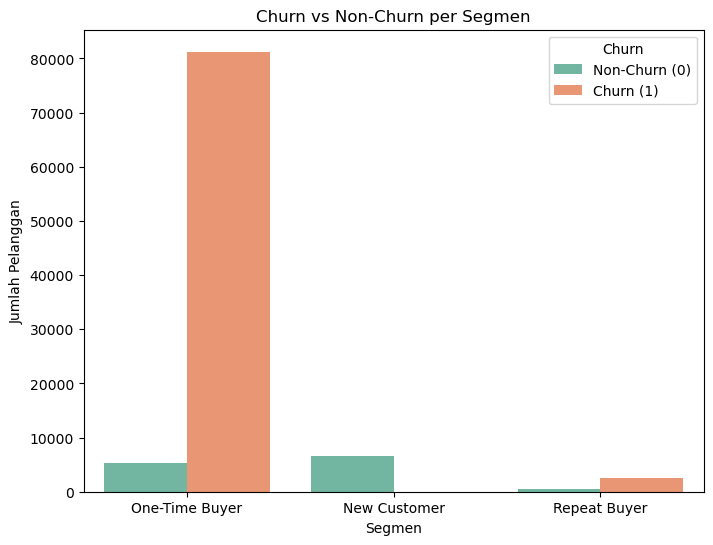

In [60]:
# --- 6. Melihat Hasil Segmentasi dan Churn ---
print(customer_seg.head())

# Visualisasi distribusi segmen
segment_counts = customer_seg['segment'].value_counts()

# Visualisasi distribusi churn per segmen
plt.figure(figsize=(8,6))
sns.countplot(data=customer_seg, x='segment', hue='churn', palette='Set2')
plt.title("Churn vs Non-Churn per Segmen")
plt.xlabel("Segmen")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Churn", labels=["Non-Churn (0)", "Churn (1)"])
plt.show()

dari hasil diatas kita bisa melihat:
1. untuk new customer, 100% dari mereka tidak churn, ini sudah sesuai ekspetasi
2. untuk One-Time Buyer, 90% lebih dari segment ini churn, kita harus bisa mendefinisikan lbih baik lagi kapan mreka churn
3. untuk Repeat Buyer, 80% di segment ini masih sama dgan One-Time Buyer, kita harus bisa mendefinisikan lebih baik lagi kapan mereka churn

Mengingat Olist adalah e-commerce yang menjual berbagai jenis produk dengan siklus pembelian yang berbeda-beda, kita tidak bisa semata-mata mengacu pada satu rentang waktu universal untuk mendefinisikan churn. Setiap kategori produk memiliki pola repeat order yang unik, sehingga definisi churn sebaiknya disesuaikan dengan karakteristik produk yang dibeli pelanggan. Dengan demikian, kita dapat mengidentifikasi perilaku churn secara lebih akurat dan merancang strategi retensi yang lebih efektif.